In [118]:
#! /usr/bin/python3.8

#https://check.torproject.org/torbulkexitlist?ip=1.1.1.1

#https://censys.io/
#https://censys.io/ipv4/54.37.16.241

#https://hackertarget.com/tor-exit-node-visualization/

In [119]:
import sys
!{sys.executable} -m pip install matplotlib seaborn sklearn
!{sys.executable} -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [128]:
import json
import numpy as np
import networkx as nx
import collections
import matplotlib
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common import keys, action_chains
import pandas as pd
import seaborn as sns
from datetime import datetime
from dateutil import parser
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
import requests
import time
import tqdm

%matplotlib inline

In [129]:
url = 'https://check.torproject.org/torbulkexitlist?ip=1.1.1.1'

In [130]:
browser = webdriver.Firefox()
browser.get(url)

In [131]:
elements_IP = browser.find_elements_by_xpath('/html/body/pre')

for i in elements_IP:
    print(i.text)

176.10.99.200
54.37.16.241
109.70.100.40
51.75.64.23
94.32.66.48
82.221.128.191
109.70.100.43
185.220.100.254
97.74.237.196
185.220.103.9
172.105.35.249
144.217.60.239
195.176.3.23
185.220.100.243
185.220.100.245
198.58.107.53
104.196.43.128
199.249.230.83
185.129.62.62
199.249.230.75
185.220.101.11
104.244.76.13
185.220.101.13
66.70.228.168
185.220.101.130
23.129.64.191
23.129.64.207
71.19.144.106
95.143.193.125
80.127.116.96
51.38.64.136
185.220.100.241
124.109.1.207
109.70.100.34
185.220.101.199
178.20.55.18
178.17.170.112
130.204.161.3
45.125.65.45
142.44.246.156
185.220.101.205
195.176.3.20
49.50.107.221
199.249.230.121
109.70.100.35
89.34.27.149
91.250.242.12
185.82.219.109
46.182.21.248
185.220.103.4
51.79.86.181
205.185.117.149
192.160.102.164
199.249.230.89
45.15.16.72
51.79.86.177
80.79.23.7
149.56.44.47
212.21.66.6
207.244.70.35
217.79.178.53
51.79.53.146
185.220.100.242
185.220.101.9
109.201.133.100
217.170.204.126
204.11.50.131
171.25.193.77
185.220.102.8
91.92.109.43
199.

In [132]:
res=[]

for i in range(0, len(elements_IP)):
    IP = elements_IP[i].text
    res.append((IP.split()))
    
len(IP.split())

1393

In [133]:
df = pd.DataFrame(IP.split(),columns=['IP'])
df

,IP
0,176.10.99.200
1,54.37.16.241
2,109.70.100.40
3,51.75.64.23
4,94.32.66.48
...,...
1388,80.78.22.150
1389,185.82.127.125
1390,200.98.132.143
1391,176.123.5.150


In [134]:
#res = []
#n = 0

#elements_IP = browser.find_elements_by_xpath('/html/body/pre')

#for i in elements_IP:
#    IP = i.text
    #IP = re.match('[0-9]{1,3}.[0-9]{1,3}.[0-9]{1,3}.[0-9]{1,3}', i.text, flags = 0)
    #print(IP)
 #   res.append((IP.split()))
  #  for e in IP:
   #     if e == re.match('[0-9]{1,3}.[0-9]{1,3}.[0-9]{1,3}.[0-9]{1,3}', i.text, flags = 0):
    #        n = n + 1
    #for i in range(0, len(elements_IP),1):
    #    IP = elements_IP[i]
    #    res.append((IP))
    #if(i.text == re.match('[0-9]{1,3}.[0-9]{1,3}.[0-9]{1,3}.[0-9]{1,3}', i.text, flags = 0)):
     #   print(i.text)
    #else:
        #print(i.text)
        #print("ERROR")
    #print(i.text)
    #n += (i.text)
    #regex_IP = re.match('[0-9]{1,3}.[0-9]{1,3}.[0-9]{1,3}.[0-9]{1,3}', e.text, flags = 0)
    #for e in i.text:
        #z += 1
    #print(regex_IP)
    #rangeIP = ('\n'.join(tab))
    #tab.append((e.text))
    

#len(i.text)
#print(' ------------------------------------------------------------------------------------------- ')
#print(rangeIP)
#len(rangeIP)
#tab
#print(n)
#res



#list = []
#number = elements_IP.count
#print(number)
#print(IP)
#print(tab)

#print(tab)

#rangeIP = ('\n'.join(tab))
#print(rangeIP)

#res = []
#for i in range(0, len(elements_IP), 1):
#    sorted(elements_IP.s)
#    IP = elements_IP[i].text
#    res.append((IP))

#res


#rangeIP = res.s

# REGEX : [0-9]{1,3}.[0-9]{1,3}.[0-9]{1,3}.[0-9]{1,3}
#regex_IP = re.match(pattern, string, flags=0)
#regex_IP = re.match('[0-9]{1,3}.[0-9]{1,3}.[0-9]{1,3}.[0-9]{1,3}', tab, flags = 0)
#a = "205.185.113.76\n209.141.54.196\n91.192.103.27\n51.159.144.243\n51.158.122.98\n51.158.68.56\n51.159.139.61\n107.189.11.80\n37.228.94.219\n51.159.189.31\n51.159.158.157\n45.10.55.116\n51.158.96.122\n83.97.20.205\n185.196.2.251\n5.2.64.230\n185.130.44.168\n185.112.144.20\n151.115.36.146\n151.115.41.209\n151.115.57.4\n51.158.164.63\n51.15.89.11\n51.158.166.41\n176.253.10.116\n212.139.87.122\n79.77.187.9\n209.141.39.33\n149.28.170.253\n209.141.58.188\n209.141.56.96\n205.185.120.173\n37.187.96.183\n104.238.129.125\n5.2.67.21\n209.141.41.225\n104.244.72.152\n68.183.184.174\n135.148.32.174\n135.148.32.178\n135.148.32.173\n135.148.32.176\n135.148.32.168\n135.148.32.171\n135.148.32.169\n135.148.32.179\n135.148.32.172\n135.148.32.175\n93.95.102.52\n45.142.215.44\n5.188.44.216\n91.211.248.106\n209.141.37.163\n185.104.112.199\n199.19.226.170\n94.140.115.230\n2.221.109.29\n146.59.234.220\n95.216.164.151"
#b = a.split("\n")
#print(b)
#for i in a:
#for i in range(rangeIP):
#    regex_IP = re.match('[0-9]{1,3}.[0-9]{1,3}.[0-9]{1,3}.[0-9]{1,3}', i, flags = 0)
#    print(regex_IP)
#regex_IP
#print(tab)
#len(e.text)
#n

In [135]:
#pl = sns.displot(data=df, x='IP', binwidth=3, kde=True, multiple="stack")
#pl.set_xticklabels(rotation=90)

In [136]:
#res = []

#for i in range(0, len(elements_IP),1):
#    IP = elements_IP[i]
#    res.append((IP))

#res
#len(list(res))
#len(res)
#len(dict(res))

In [137]:
#df = pd.DataFrame(res, columns=['IP'])
#df

#df = pd.DataFrame(res, columns = ['ip'])
#df
#df = pd.DataFrame(res, columns = ['ip'])
#df

In [138]:
browser.close()

In [139]:
# SHODAN

In [140]:
api_key = 'HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj'
data = '164.128.164.28'
url_shodan = 'https://api.shodan.io/shodan/host/'

In [141]:
r = requests.get(url_shodan+data, params={'key': api_key})
r

<Response [200]>

In [142]:
res = r.json()
res

In [143]:
res['isp']

2759894044

In [144]:
r.url

'https://api.shodan.io/shodan/host/164.128.164.28?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj'

In [158]:
isp = []
country = []
ips = []
# 
for ip in df['IP']:
    r = requests.get(url_shodan+ip, params={'key': api_key})
    print(r.url)
    if r.status_code == 200:
        res = r.json()
        if 'isp' in res:
            isp.append(res['isp'])
        else:
            isp.append('unknown')
        if 'country_code' in res:
            country.append(res['country_code'])
        else:
            country.append('unknown')
        if 'ips' in res:
            ips.append(res['ips'])
        else:
            ips.append('unknown')
    else:
        isp.append('unknown')
        country.append('unknown')
        ips.append('unknown')
    time.sleep(1)


https://api.shodan.io/shodan/host/176.10.99.200?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/54.37.16.241?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/109.70.100.40?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.75.64.23?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/94.32.66.48?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/82.221.128.191?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/109.70.100.43?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.100.254?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/97.74.237.196?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.103.9?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/172.105.35.249?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/144.217.60.239?key=HhrH4mvJHh6P8

https://api.shodan.io/shodan/host/46.232.251.191?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/176.58.100.98?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.244.76.69?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.79.86.175?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.65?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/94.16.121.91?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.244.78.231?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.118?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/195.254.135.76?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.102.7?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.254.48.93?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.5?key=HhrH4mvJHh

https://api.shodan.io/shodan/host/51.158.111.157?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.4?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.138?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/178.17.170.164?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/139.162.10.72?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.144?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/107.189.10.42?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.100.244?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.100.85.101?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/193.169.145.66?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/192.160.102.170?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/167.86.94.107?key=H

https://api.shodan.io/shodan/host/23.129.64.215?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/31.31.72.24?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.165.168.168?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.17?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/198.251.83.193?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/198.96.155.3?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.130.44.108?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/18.27.197.252?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/82.221.131.71?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/89.34.27.59?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/212.47.229.4?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/178.17.170.135?key=HhrH4mvJHh6P8

https://api.shodan.io/shodan/host/51.161.43.235?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/103.208.220.226?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/23.129.64.202?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/180.150.226.99?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/95.128.43.164?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/85.248.227.165?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/189.84.21.44?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/144.217.60.211?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/109.70.100.31?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.100?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.79.86.180?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/45.140.170.187?key=HhrH4mv

https://api.shodan.io/shodan/host/89.245.95.213?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/83.135.200.103?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/87.123.35.235?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/87.123.42.78?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/87.123.42.20?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/87.123.40.189?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/83.135.202.78?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/87.123.42.110?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/87.123.43.35?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/83.135.195.162?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/87.123.66.77?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/83.135.200.105?key=HhrH4mvJHh6P8F

https://api.shodan.io/shodan/host/185.220.101.209?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.149?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.202?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.135?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.8?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.16?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.193?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.194?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.208?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/195.37.209.9?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.210?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.201

https://api.shodan.io/shodan/host/145.239.95.15?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/35.199.85.150?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.185.170.27?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/209.141.46.47?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.244.73.43?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/193.218.118.155?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/193.218.118.156?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.218.63.119?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/209.141.53.20?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.1?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.146?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.133?key=Hhr

https://api.shodan.io/shodan/host/199.249.230.66?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.73?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.177?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.116?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.88?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.150?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.72?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.161?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.86?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.69?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.155?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.175

https://api.shodan.io/shodan/host/193.19.167.21?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/193.148.70.4?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.244.74.28?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/198.98.52.75?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/176.107.179.147?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.113.140.155?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.34.33.2?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/198.98.52.119?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/35.198.1.137?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/31.220.40.237?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/31.220.40.236?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/31.220.40.239?key=HhrH4mvJHh6P8F

https://api.shodan.io/shodan/host/193.31.24.154?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/101.99.90.171?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/91.192.103.15?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/91.192.103.16?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/31.220.0.202?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/31.220.0.203?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/178.17.174.164?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/31.220.0.249?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/91.192.103.24?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/91.192.103.17?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/176.123.7.102?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.77.103.164?key=HhrH4mvJHh6P8FE

https://api.shodan.io/shodan/host/198.144.120.177?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/193.218.118.95?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/194.110.113.40?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/107.189.11.153?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/107.189.10.243?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.244.74.121?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.32.222.173?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.210.243.196?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.75.64.21?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.244.73.93?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/45.153.160.129?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/37.187.2.76?key=HhrH4mv

https://api.shodan.io/shodan/host/51.91.96.151?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.77.150.155?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.91.98.249?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/198.98.51.151?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/91.192.103.43?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/91.192.103.42?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/139.99.88.87?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.195.202.145?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/146.59.235.27?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/91.192.103.44?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/91.192.103.50?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/31.220.3.148?key=HhrH4mvJHh6P8FEj

https://api.shodan.io/shodan/host/178.33.122.96?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.191.124.153?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/176.31.233.231?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/217.182.138.4?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/176.31.239.78?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/31.220.3.97?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.191.124.143?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/217.182.138.24?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/176.31.238.221?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/176.31.239.197?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/217.182.138.8?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/5.2.79.145?key=HhrH4mvJHh

https://api.shodan.io/shodan/host/209.141.39.33?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/149.28.170.253?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/209.141.58.188?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/209.141.56.96?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/205.185.120.173?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/37.187.96.183?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.238.129.125?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/5.2.67.21?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/209.141.41.225?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.244.72.152?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/68.183.184.174?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/135.148.32.174?key=HhrH4mv

In [159]:
isp

['Datasource AG',
 'OVH SAS',
 'Next Layer Telekommunikationsdienstleistungs- und',
 'OVH SAS',
 'Tiscali SpA',
 'Advania Island ehf',
 'Next Layer Telekommunikationsdienstleistungs- und',
 'unknown',
 'unknown',
 'The Calyx Institute',
 'Linode',
 'unknown',
 'Swiss Education and Research Network',
 'F3 Netze e.V.',
 'unknown',
 'Linode',
 'Google Cloud',
 'unknown',
 'Zencurity ApS',
 'Quintex Alliance Consulting',
 'Markus Koch',
 'FranTech Solutions',
 'Markus Koch',
 'unknown',
 'Markus Koch',
 'Emerald Onion',
 'unknown',
 'prgmr.com',
 'Internetport Sweden AB',
 'Xs4all Internet BV',
 'OVH SAS',
 'unknown',
 'unknown',
 'Next Layer Telekommunikationsdienstleistungs- und',
 'Markus Koch',
 'Ielo-liazo Services SAS',
 'trabia network',
 'A1 Bulgaria',
 'Tele Asia Limited',
 'OVH SAS',
 'Markus Koch',
 'unknown',
 'Cyfuture India Pvt.',
 'Quintex Alliance Consulting',
 'Next Layer Telekommunikationsdienstleistungs- und',
 'NETACTION TELECOM SRL',
 'unknown',
 'ITL LLC',
 'unknown',

In [160]:
country

['CH',
 'FR',
 'AT',
 'FR',
 'IT',
 'IS',
 'AT',
 'unknown',
 'unknown',
 'DE',
 'IN',
 'unknown',
 'CH',
 'DE',
 'unknown',
 'US',
 'US',
 'unknown',
 'DK',
 'US',
 'DE',
 'LU',
 'DE',
 'unknown',
 'DE',
 'US',
 'unknown',
 'US',
 'SE',
 'NL',
 'GB',
 'unknown',
 'unknown',
 'AT',
 'DE',
 'FR',
 'MD',
 'BG',
 'LT',
 'CA',
 'DE',
 'unknown',
 'IN',
 'US',
 'AT',
 'RO',
 'unknown',
 'BG',
 'unknown',
 'DE',
 'CA',
 'unknown',
 'CA',
 'unknown',
 'unknown',
 'CA',
 'unknown',
 'CA',
 'unknown',
 'US',
 'unknown',
 'CA',
 'DE',
 'DE',
 'unknown',
 'NO',
 'CA',
 'SE',
 'unknown',
 'BG',
 'unknown',
 'AT',
 'DE',
 'DE',
 'DE',
 'US',
 'DE',
 'unknown',
 'DE',
 'unknown',
 'unknown',
 'DE',
 'US',
 'GB',
 'RO',
 'AT',
 'CA',
 'IS',
 'US',
 'unknown',
 'unknown',
 'DE',
 'unknown',
 'NL',
 'DE',
 'FI',
 'US',
 'DE',
 'unknown',
 'LU',
 'CA',
 'US',
 'DE',
 'LU',
 'US',
 'unknown',
 'DE',
 'unknown',
 'unknown',
 'AT',
 'IS',
 'CA',
 'unknown',
 'unknown',
 'FR',
 'DE',
 'unknown',
 'AT',
 'DE

In [161]:
len(isp)

1393

In [162]:
len(country)

1393

In [163]:
df['isp'] = isp
df['country'] = country
df['country'].replace({None:'unknown'}, inplace=True)
df

,IP,isp,country
0,176.10.99.200,Datasource AG,CH
1,54.37.16.241,OVH SAS,FR
2,109.70.100.40,Next Layer Telekommunikationsdienstleistungs- und,AT
3,51.75.64.23,OVH SAS,FR
4,94.32.66.48,Tiscali SpA,IT
...,...,...,...
1388,80.78.22.150,ab stract,SE
1389,185.82.127.125,Sia Nano IT,LV
1390,200.98.132.143,unknown,unknown
1391,176.123.5.150,unknown,unknown


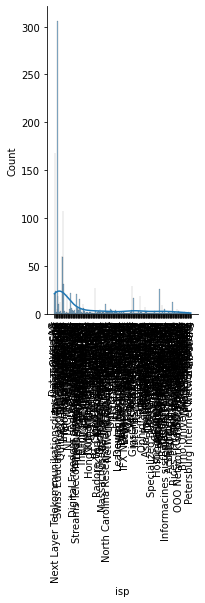

In [164]:
pli = sns.displot(data=df, x='isp', binwidth=3, kde=True, multiple="stack")
pli.set_xticklabels(rotation=90)

In [166]:
df_samples = df[['IP', 'country', 'isp']]
#df_samples.iloc[0]
#df_samples.iloc[1]
#_['ip']
#df_samples.iloc[10]
#df_samples.iloc[5:20]
#df_samples.iloc[:10]
df_samples

,IP,country,isp
0,176.10.99.200,CH,Datasource AG
1,54.37.16.241,FR,OVH SAS
2,109.70.100.40,AT,Next Layer Telekommunikationsdienstleistungs- und
3,51.75.64.23,FR,OVH SAS
4,94.32.66.48,IT,Tiscali SpA
...,...,...,...
1388,80.78.22.150,SE,ab stract
1389,185.82.127.125,LV,Sia Nano IT
1390,200.98.132.143,unknown,unknown
1391,176.123.5.150,unknown,unknown


In [167]:
g = nx.Graph()

In [169]:
for index,row in df_samples.iterrows():
    country = row['country']
    isp = row['isp']
    ip = row['IP']
    g.add_edge(country,isp)
    g.add_edge(isp,ip)

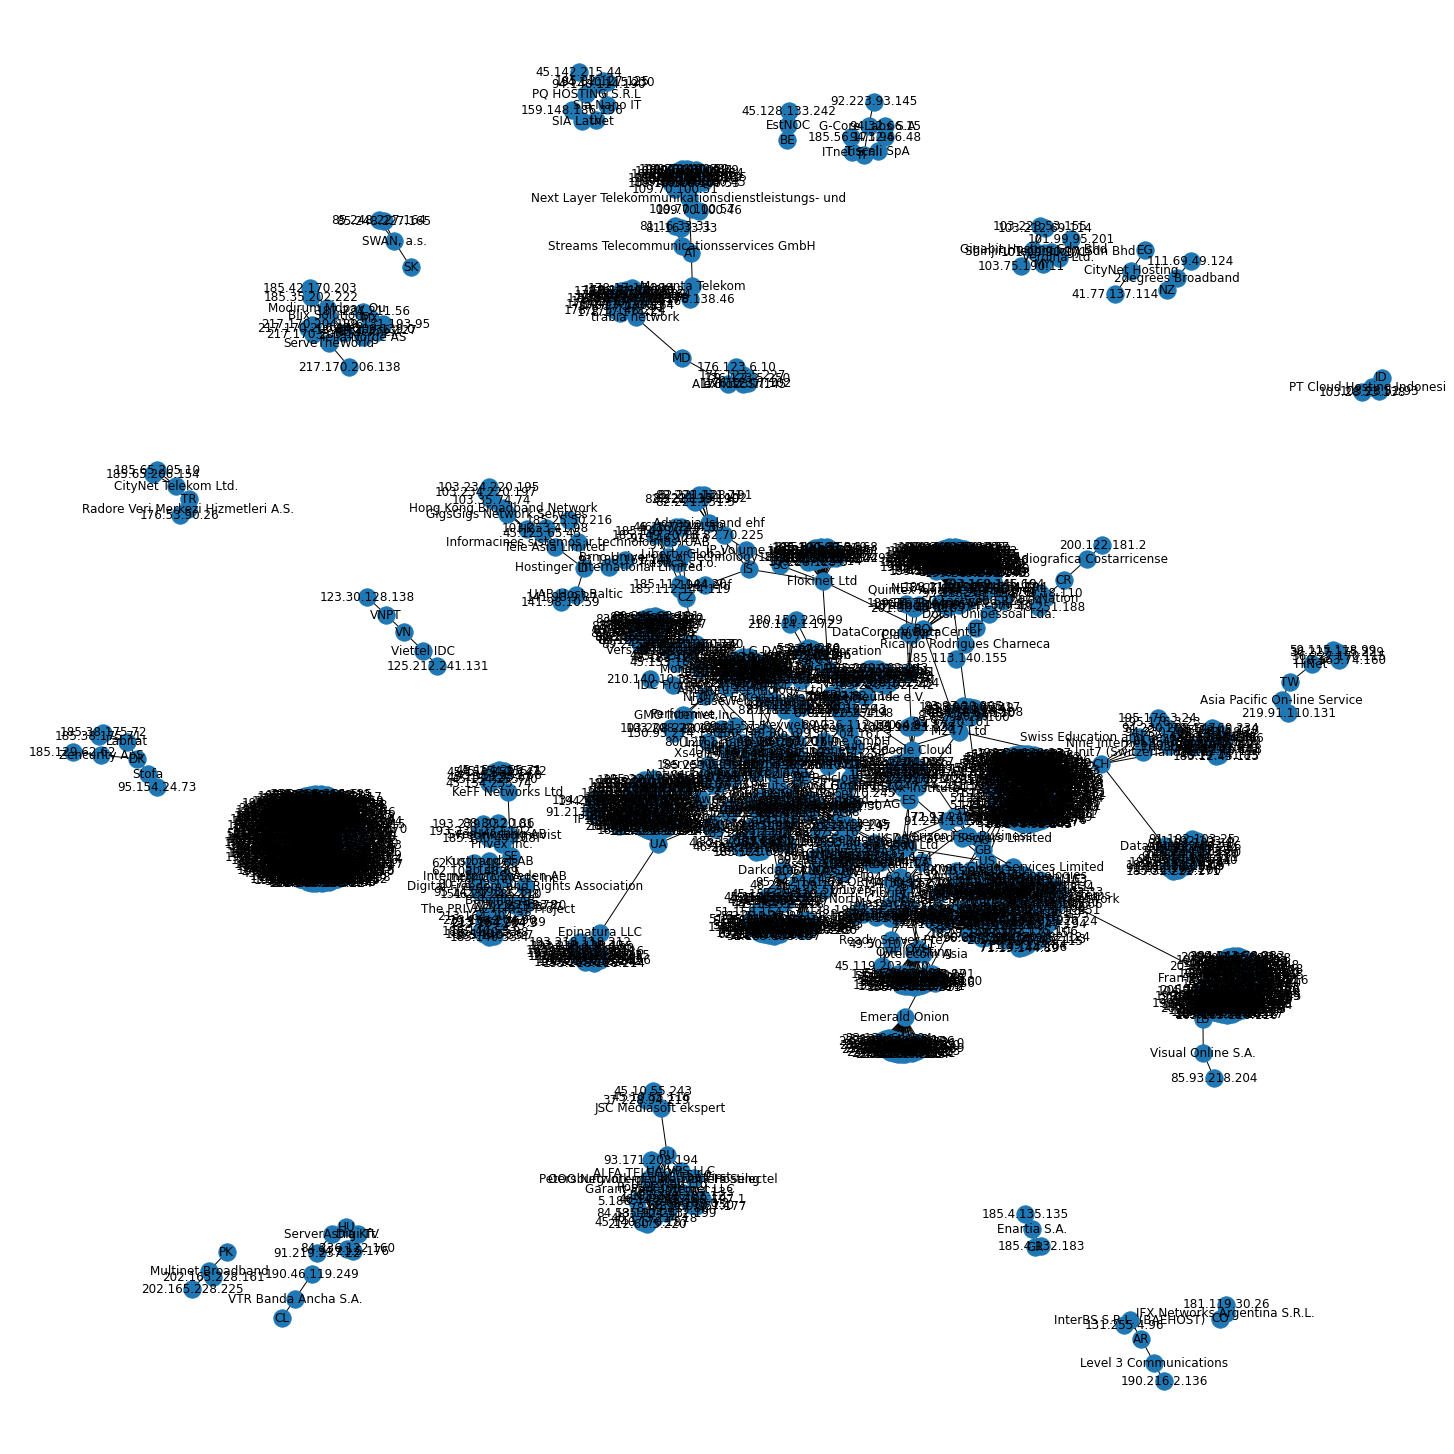

In [170]:
plt.figure(figsize=(20,20))
nx.draw(g, with_labels = True)